In [45]:
# Dependencies
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [8]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

june_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()


In [12]:
#  3. Convert the June temperatures to a list.

june_temps = list(june_results)


In [36]:
# 4. Create a DataFrame from the list of temperatures for the month of June.

june_temps_df = pd.DataFrame(june_temps, columns=['Date','Temp'])
june_temps_df.set_index(june_temps_df['Date'], inplace=True)
june_temps_df


,Date,Temp
Date,,
2010-06-01,2010-06-01,78.0
2010-06-02,2010-06-02,76.0
2010-06-03,2010-06-03,78.0
2010-06-04,2010-06-04,76.0
2010-06-05,2010-06-05,77.0
...,...,...
2017-06-26,2017-06-26,79.0
2017-06-27,2017-06-27,74.0
2017-06-28,2017-06-28,74.0


In [73]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.

june_summary = june_temps_df.describe()
june_summary

,Temp
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [38]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.

dec_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()


In [39]:
# 7. Convert the December temperatures to a list.

dec_temps = list(dec_results)


In [40]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 

dec_temps_df = pd.DataFrame(dec_temps, columns=['Date','Temp'])
dec_temps_df.set_index(dec_temps_df['Date'], inplace=True)
dec_temps_df


,Date,Temp
Date,,
2010-12-01,2010-12-01,76.0
2010-12-03,2010-12-03,74.0
2010-12-04,2010-12-04,74.0
2010-12-06,2010-12-06,64.0
2010-12-07,2010-12-07,64.0
...,...,...
2016-12-27,2016-12-27,71.0
2016-12-28,2016-12-28,71.0
2016-12-29,2016-12-29,69.0


In [72]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.

dec_summary = dec_temps_df.describe()
dec_summary

,Temp
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<AxesSubplot:title={'center':'June Temperatures on Oahu (2010-2017)'}, ylabel='Frequency'>

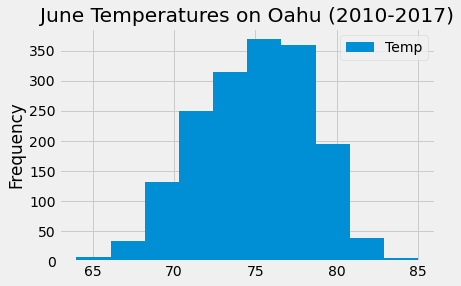

In [70]:
june_temps_df.plot.hist(bins=10, title="June Temperatures on Oahu (2010-2017)")

<AxesSubplot:title={'center':'Dec. Temperatures on Oahu (2010-2017)'}, ylabel='Frequency'>

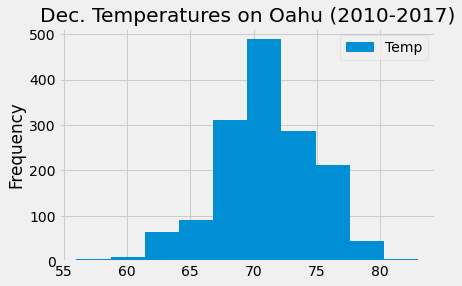

In [71]:
dec_temps_df.plot.hist(bins=10, title="Dec. Temperatures on Oahu (2010-2017)")